In [1]:
#import libraries
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#transformation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


#function that renders the figure in a notebook
%matplotlib inline

In [2]:
#load the datasets

df_test = pd.read_excel('Adult_Data_Set_Test.xlsx')

df_train = pd.read_excel('Adult_Data_Set_Train.xlsx')

### Data Cleaning

In [3]:
#return the number of rows and columns in the dataframes
df_train.shape

#32561 rows
#15 columns

(32561, 15)

In [4]:
df_test.shape
#16281 rows
#15 columns

(16281, 15)

In [5]:
#return the first 5 rows
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,48,Private,212954,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,High
1,46,Private,194698,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,?,United-States,Low
2,?,Local-gov,113545,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,Low
3,36,Private,176050,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,?,United-States,Low
4,49,Private,39986,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,Low


In [6]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,17,Private,35603,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,Low
1,34,Private,236861,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,High
2,33,Local-gov,107417,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,High
3,18,?,348533,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,3,United-States,Low
4,55,Private,254711,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,High


head of the test df shows there are missing values in workclass and occupation.

In [7]:
df_train.describe()

,fnlwgt,education-num,capital-gain,capital-loss
count,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,1.897784e+05,10.080679,1077.648844,87.303830
std,1.055500e+05,2.572720,7385.292085,402.960219
min,1.228500e+04,1.000000,0.000000,0.000000
25%,1.178270e+05,9.000000,0.000000,0.000000
50%,1.783560e+05,10.000000,0.000000,0.000000
75%,2.370510e+05,12.000000,0.000000,0.000000
max,1.484705e+06,16.000000,99999.000000,4356.000000


In [8]:
df_test.describe()

,fnlwgt,education-num,capital-gain,capital-loss
count,1.628100e+04,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269
std,1.057149e+05,2.567545,7583.935968,403.105286
min,1.349200e+04,1.000000,0.000000,0.000000
25%,1.167360e+05,9.000000,0.000000,0.000000
50%,1.778310e+05,10.000000,0.000000,0.000000
75%,2.383840e+05,12.000000,0.000000,0.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000


In [9]:
#return summary of the dataset data types

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null object
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null object
native-country    32561 non-null object
class-label       32561 non-null object
dtypes: int64(4), object(11)
memory usage: 3.7+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null object
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null object
native-country    16281 non-null object
class-label       16281 non-null object
dtypes: int64(4), object(11)
memory usage: 1.9+ MB


Datasets contain no null values but review of head shows that missing values are represented with '?'

fnlweight, education-num, capital gain/loss are ingeter values.

Both age and hours per week have been mislabled and need to be changed from an object into a integer value

All other columns are of type object

In [11]:
#replace ? values with nan
df_train[df_train == '?'] = np.nan
df_test[df_test == '?'] = np.nan

C:\Users\Jarrod\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
df_train['age'] =pd.to_numeric(df_train['age'])
df_train['hours-per-week'] =pd.to_numeric(df_train['hours-per-week'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               30849 non-null float64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    30974 non-null float64
native-country    32561 non-null object
class-label       32561 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30849.0,38.586307,13.599507,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30974.0,40.469394,12.322917,1.0,40.0,40.0,45.0,99.0


In [14]:
df_test['age'] =pd.to_numeric(df_test['age'])
df_test['hours-per-week'] =pd.to_numeric(df_test['hours-per-week'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               15524 non-null float64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    15468 non-null float64
native-country    16281 non-null object
class-label       16281 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 1.9+ MB


In [15]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15524.0,38.785622,13.852404,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
education-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hours-per-week,15468.0,40.412335,12.495668,1.0,40.0,40.0,45.0,99.0


In the training data frame, the fields age, and hours per week there are missing values which were masked with the filler '?' value

As both fields are numerical, the best way to address these missing values is by replacing them with the mean:

-Age - 39 

-Hours per week - 40

In [16]:
df_train['age'] = df_train['age'].replace(np.nan, 39)
df_train['hours-per-week'] = df_train['hours-per-week'].replace(np.nan, 40)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null float64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null float64
native-country    32561 non-null object
class-label       32561 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [18]:
df_test['age'] = df_test['age'].replace(np.nan, 39)
df_test['hours-per-week'] = df_test['hours-per-week'].replace(np.nan, 40)

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null float64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null float64
native-country    16281 non-null object
class-label       16281 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 1.9+ MB


In [20]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,17.0,Private,35603,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20.0,United-States,Low
1,34.0,Private,236861,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40.0,United-States,High
2,33.0,Local-gov,107417,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40.0,United-States,High
3,18.0,?,348533,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,3.0,United-States,Low
4,55.0,Private,254711,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,20.0,United-States,High


age


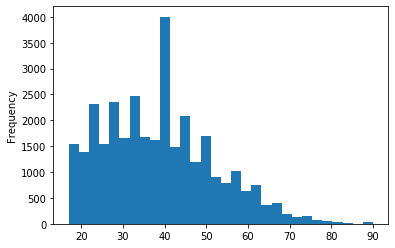

workclass


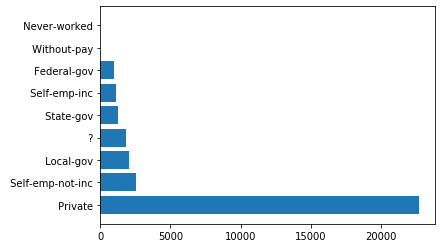

fnlwgt


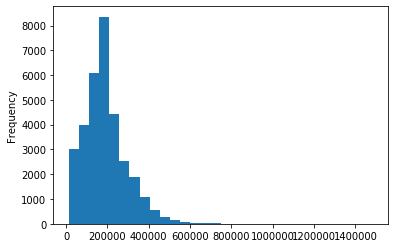

education


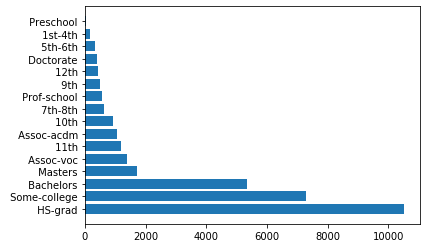

education-num


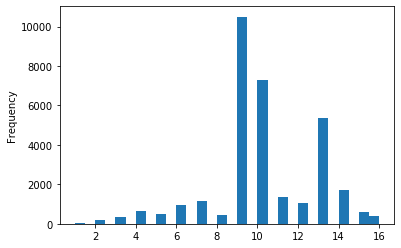

marital-status


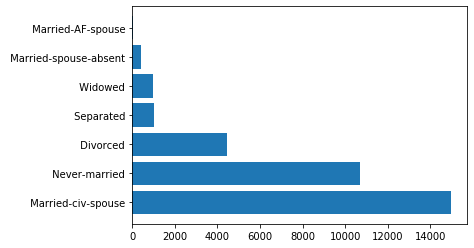

occupation


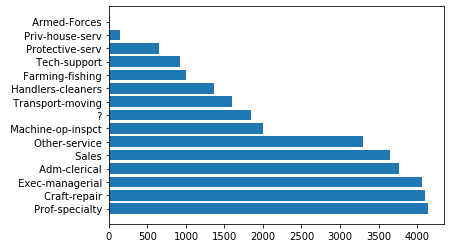

relationship


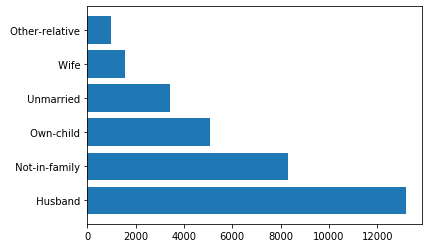

race


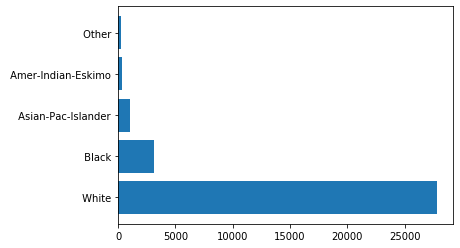

sex


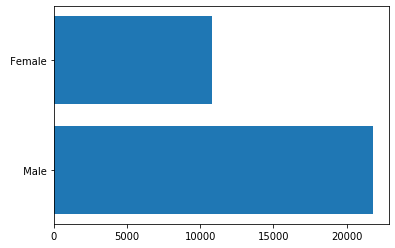

capital-gain


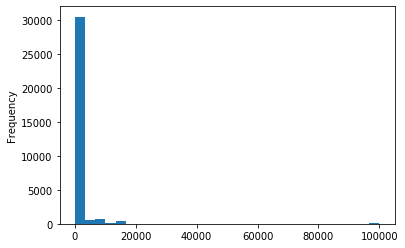

capital-loss


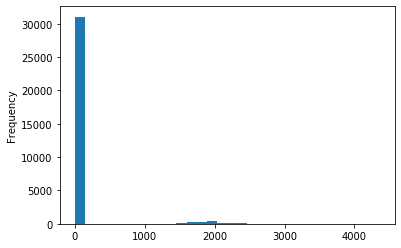

hours-per-week


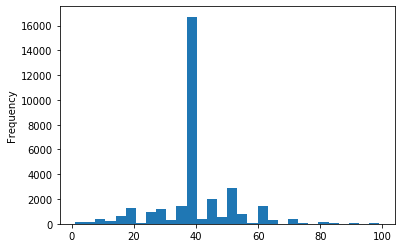

native-country


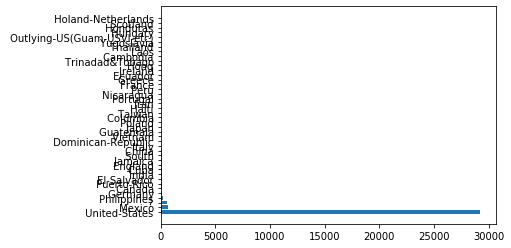

class-label


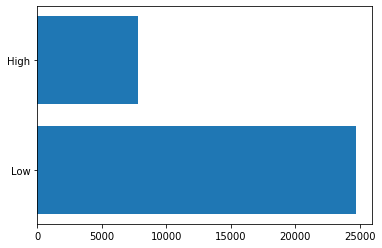

In [21]:
#plot all attributes as histogram
for i in df_train.columns:
    print(i)
    try: 
        df_train[i].plot.hist(bins = 30)
        plt.show()
    except:
        plt.barh(df_train[i].value_counts().index, df_train[i].value_counts().values)
        plt.show()

age


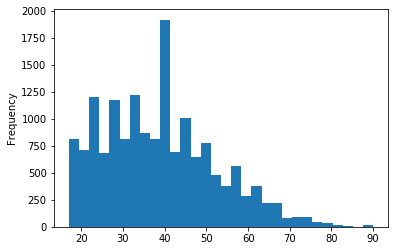

workclass


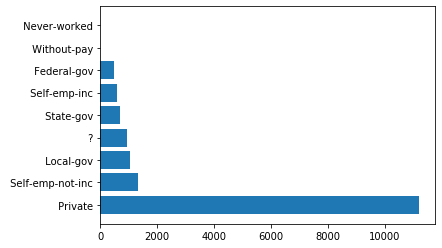

fnlwgt


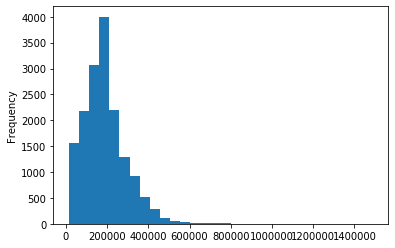

education


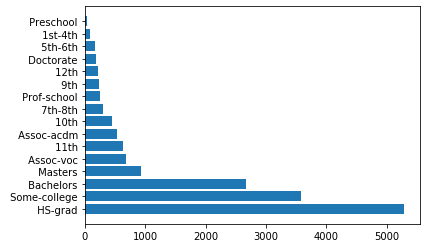

education-num


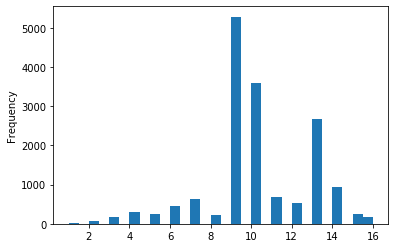

marital-status


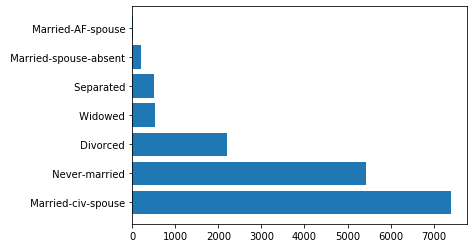

occupation


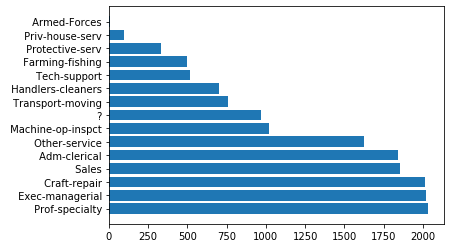

relationship


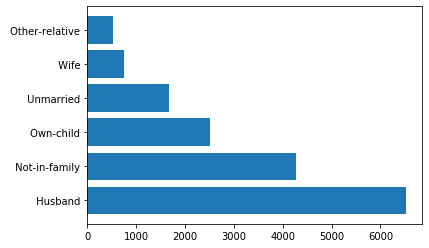

race


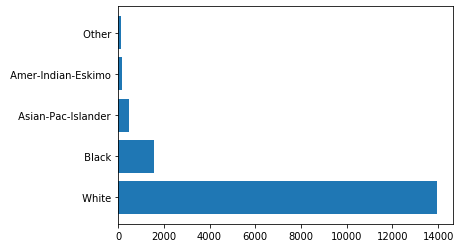

sex


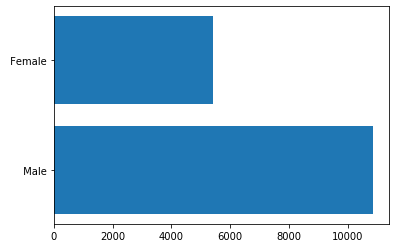

capital-gain


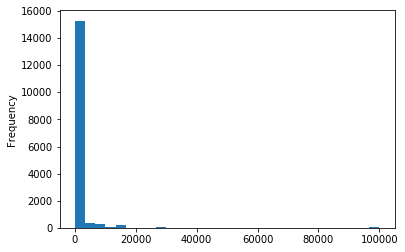

capital-loss


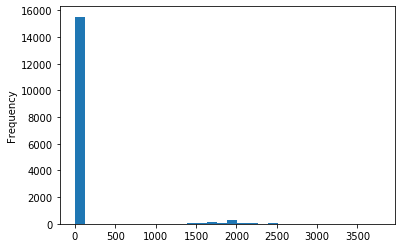

hours-per-week


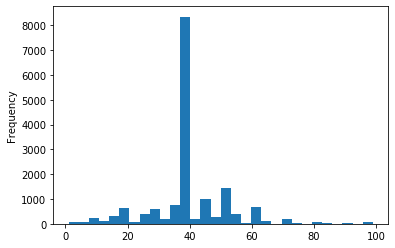

native-country


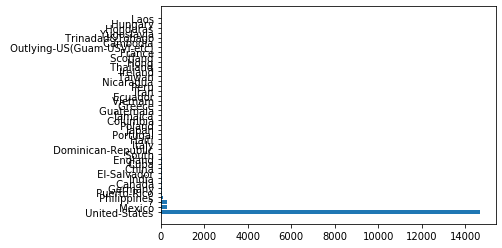

class-label


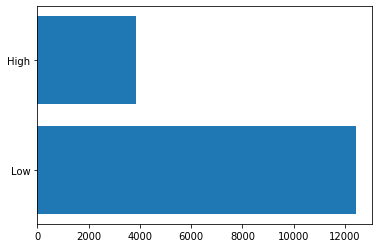

In [22]:
#plot all attributes as histogram
for i in df_test.columns:
    print(i)
    try: 
        df_test[i].plot.hist(bins = 30)
        plt.show()
    except:
        plt.barh(df_test[i].value_counts().index, df_test[i].value_counts().values)
        plt.show()

Transforming some of these fields to assist with avoiding underfitting the models.

These values will be changed before transforming the values into intigers for modelling.


Workclass - 
drop all missing values and replace with private (mode)


education-num
-dropping, it is a count of the number of years of education an individual obtained but does not indicate the individual completed the course

marital-status
turn into a binary variable. single and married

Occupation

-replace missing values with prof-specialty (mode)

relationship
-relationship appears to be similar to educational num, there are more indicative metrics (marital-status) which provides the same information in a more useful form. deleting

Capital gain/loss 
-Both are sparcely populated and will be dropped

Navite country
-grouping into US and non-US to group together other countries.

In [23]:
##dropping education num, relationship, capital gain/loss
df_train.drop('education-num', axis = 1, inplace=True)
df_train.drop('fnlwgt', axis = 1, inplace=True)
df_train.drop('relationship', axis = 1, inplace=True)
df_train.drop('capital-gain', axis = 1, inplace =True)
df_train.drop('capital-loss', axis = 1, inplace =True)

df_test.drop('education-num', axis = 1, inplace=True)
df_test.drop('fnlwgt', axis = 1, inplace=True)
df_test.drop('relationship', axis = 1, inplace=True)
df_test.drop('capital-gain', axis = 1, inplace =True)
df_test.drop('capital-loss', axis = 1, inplace =True)

In [24]:
df_train.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,class-label
0,48.0,Private,Some-college,Married-civ-spouse,Craft-repair,White,Male,60.0,United-States,High
1,46.0,Private,Bachelors,Never-married,Prof-specialty,White,Male,40.0,United-States,Low
2,39.0,Local-gov,Bachelors,Never-married,Prof-specialty,White,Female,40.0,United-States,Low
3,36.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,White,Male,40.0,United-States,Low
4,49.0,Private,9th,Married-civ-spouse,Craft-repair,White,Male,40.0,United-States,Low


In [25]:
df_test.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,class-label
0,17.0,Private,12th,Never-married,Sales,White,Female,20.0,United-States,Low
1,34.0,Private,HS-grad,Married-civ-spouse,Tech-support,White,Male,40.0,United-States,High
2,33.0,Local-gov,Masters,Married-civ-spouse,Prof-specialty,White,Male,40.0,United-States,High
3,18.0,?,HS-grad,Never-married,?,White,Female,3.0,United-States,Low
4,55.0,Private,Bachelors,Married-civ-spouse,Sales,White,Male,20.0,United-States,High


In [26]:
#display value counts for each column indivdually
for i in df_train.columns:
    print(i)
    print(pd.DataFrame({'count': df_train[i].value_counts()}))
    print ("END")
    print('\n\n\n\n')

age
      count
39.0   2482
36.0    848
34.0    844
33.0    838
31.0    837
...     ...
83.0      5
85.0      3
88.0      2
86.0      1
87.0      1

[73 rows x 1 columns]
END





workclass
                   count
 Private           22696
 Self-emp-not-inc   2541
 Local-gov          2093
 ?                  1836
 State-gov          1298
 Self-emp-inc       1116
 Federal-gov         960
 Without-pay          14
 Never-worked          7
END





education
               count
 HS-grad       10501
 Some-college   7291
 Bachelors      5355
 Masters        1723
 Assoc-voc      1382
 11th           1175
 Assoc-acdm     1067
 10th            933
 7th-8th         646
 Prof-school     576
 9th             514
 12th            433
 Doctorate       413
 5th-6th         333
 1st-4th         168
 Preschool        51
END





marital-status
                        count
 Married-civ-spouse     14976
 Never-married          10683
 Divorced                4443
 Separated               1025
 Widowed  

In [27]:
#display value counts for each column indivdually
for i in df_test.columns:
    print(i)
    print(pd.DataFrame({'count': df_test[i].value_counts()}))
    print ("END")
    print('\n\n\n\n')

age
      count
39.0   1129
35.0    446
23.0    432
33.0    430
36.0    427
...     ...
88.0      3
87.0      2
82.0      2
89.0      2
85.0      2

[73 rows x 1 columns]
END





workclass
                   count
 Private           11210
 Self-emp-not-inc   1321
 Local-gov          1043
 ?                   963
 State-gov           683
 Self-emp-inc        579
 Federal-gov         472
 Without-pay           7
 Never-worked          3
END





education
               count
 HS-grad        5283
 Some-college   3587
 Bachelors      2670
 Masters         934
 Assoc-voc       679
 11th            637
 Assoc-acdm      534
 10th            456
 7th-8th         309
 Prof-school     258
 9th             242
 12th            224
 Doctorate       181
 5th-6th         176
 1st-4th          79
 Preschool        32
END





marital-status
                        count
 Married-civ-spouse      7403
 Never-married           5434
 Divorced                2190
 Widowed                  525
 Separated

In [28]:
#change type to category 
df_train['workclass'] = df_train['workclass'].astype('category')
df_train['education'] = df_train['education'].astype('category')
df_train['marital-status'] = df_train['marital-status'].astype('category')
df_train['occupation'] = df_train['occupation'].astype('category')
df_train['race'] = df_train['race'].astype('category')
df_train['sex'] = df_train['sex'].astype('category')
df_train['native-country'] = df_train['native-country'].astype('category')
df_train['class-label'] = df_train['class-label'].astype('category')

In [29]:
df_test['workclass'] = df_test['workclass'].astype('category')
df_test['education'] = df_test['education'].astype('category')
df_test['marital-status'] = df_test['marital-status'].astype('category')
df_test['occupation'] = df_test['occupation'].astype('category')
df_test['race'] = df_test['race'].astype('category')
df_test['sex'] = df_test['sex'].astype('category')
df_test['native-country'] = df_test['native-country'].astype('category')
df_test['class-label'] = df_test['class-label'].astype('category')

In [30]:
#replace values with integers  
df_train['workclass'] = df_train['workclass'].cat.codes
df_train['education'] = df_train['education'].cat.codes
df_train['marital-status'] = df_train['marital-status'].cat.codes
df_train['occupation'] = df_train['occupation'].cat.codes
df_train['race'] = df_train['race'].cat.codes
df_train['sex'] = df_train['sex'].cat.codes
df_train['native-country'] = df_train['native-country'].cat.codes
df_train['class-label'] = df_train['class-label'].cat.codes

In [31]:
df_test['workclass'] = df_test['workclass'].cat.codes
df_test['education'] = df_test['education'].cat.codes
df_test['marital-status'] = df_test['marital-status'].cat.codes
df_test['occupation'] = df_test['occupation'].cat.codes
df_test['race'] = df_test['race'].cat.codes
df_test['sex'] = df_test['sex'].cat.codes
df_test['native-country'] = df_test['native-country'].cat.codes
df_test['class-label'] = df_test['class-label'].cat.codes

In [32]:
##update workclass and occupation missing values with mode

df_train.mode()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,class-label
0,39.0,4,11,2,10,4,1,40.0,39,1


In [33]:
df_train['workclass'].replace(0, 4, inplace=True)
df_train['occupation'].replace(0, 4, inplace=True)

In [34]:
df_test.mode()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,class-label
0,39.0,4,11,2,10,4,1,40.0,38,1


In [35]:
df_test['workclass'].replace(0, 4, inplace=True)
df_test['occupation'].replace(0, 10, inplace=True)

rerun value counts

In [36]:
#display value counts for each column indivdually
for i in df_train.columns:
    print(i)
    print(pd.DataFrame({'count': df_train[i].value_counts()}))
    print ("END")
    print('\n\n\n\n')

age
      count
39.0   2482
36.0    848
34.0    844
33.0    838
31.0    837
...     ...
83.0      5
85.0      3
88.0      2
86.0      1
87.0      1

[73 rows x 1 columns]
END





workclass
   count
4  24532
6   2541
2   2093
7   1298
5   1116
1    960
8     14
3      7
END





education
    count
11  10501
15   7291
9    5355
12   1723
8    1382
1    1175
7    1067
0     933
5     646
14    576
6     514
2     433
10    413
4     333
3     168
13     51
END





marital-status
   count
2  14976
4  10683
0   4443
5   1025
6    993
3    418
1     23
END





occupation
    count
4    5909
10   4140
3    4099
1    3770
12   3650
8    3295
7    2002
14   1597
6    1370
5     994
13    928
11    649
9     149
2       9
END





race
   count
4  27816
2   3124
1   1039
0    311
3    271
END





sex
   count
1  21790
0  10771
END





hours-per-week
      count
40.0  16089
50.0   2687
45.0   1732
60.0   1398
35.0   1225
...     ...
92.0      1
82.0      1
94.0      1
74.0      1
87.0      

In [37]:
#display value counts for each column indivdually
for i in df_test.columns:
    print(i)
    print(pd.DataFrame({'count': df_test[i].value_counts()}))
    print ("END")
    print('\n\n\n\n')

age
      count
39.0   1129
35.0    446
23.0    432
33.0    430
36.0    427
...     ...
88.0      3
87.0      2
82.0      2
89.0      2
85.0      2

[73 rows x 1 columns]
END





workclass
   count
4  12173
6   1321
2   1043
7    683
5    579
1    472
8      7
3      3
END





education
    count
11   5283
15   3587
9    2670
12    934
8     679
1     637
7     534
0     456
5     309
14    258
6     242
2     224
10    181
4     176
3      79
13     32
END





marital-status
   count
2   7403
4   5434
0   2190
6    525
5    505
3    210
1     14
END





occupation
    count
10   2998
4    2020
3    2013
12   1854
1    1841
8    1628
7    1020
14    758
6     702
13    518
5     496
11    334
9      93
2       6
END





race
   count
4  13946
2   1561
1    480
0    159
3    135
END





sex
   count
1  10860
0   5421
END





hours-per-week
      count
40.0   8006
50.0   1363
45.0    848
60.0    667
35.0    609
...     ...
73.0      2
89.0      1
76.0      1
69.0      1
79.0      

### Binning

Workclass -> Private/other - 1/0

education -> highschool or less/ batchalors or greater - 0/1

marital status -> married/single - 1/0

native country -> United States/other 1/0

##### Binning Training DF

In [38]:
#workclass
df_train['workclass'].replace(6, 0, inplace=True)
df_train['workclass'].replace(2, 0, inplace=True)
df_train['workclass'].replace(7, 0, inplace=True)
df_train['workclass'].replace(5, 0, inplace=True)
df_train['workclass'].replace(1, 0, inplace=True)
df_train['workclass'].replace(8, 0, inplace=True)
df_train['workclass'].replace(3, 0, inplace=True)
df_train['workclass'].replace(4, 1, inplace=True)

In [39]:
#education
df_train['education'].replace(11, 0, inplace=True)
df_train['education'].replace(15, 0, inplace=True)
df_train['education'].replace(1, 0, inplace=True)
df_train['education'].replace(5, 0, inplace=True)
df_train['education'].replace(6, 0, inplace=True)
df_train['education'].replace(2, 0, inplace=True)
df_train['education'].replace(4, 0, inplace=True)
df_train['education'].replace(3, 0, inplace=True)
df_train['education'].replace(13, 0, inplace=True)

df_train['education'].replace(9, 1, inplace=True)
df_train['education'].replace(12, 1, inplace=True)
df_train['education'].replace(8, 1, inplace=True)
df_train['education'].replace(7, 1, inplace=True)
df_train['education'].replace(14, 1, inplace=True)
df_train['education'].replace(10, 1, inplace=True)

In [40]:
#Marital-status

df_train['marital-status'].replace(4, 0, inplace=True)
df_train['marital-status'].replace(5, 0, inplace=True)
df_train['marital-status'].replace(6, 0, inplace=True)

df_train['marital-status'].replace(2, 1, inplace=True)
df_train['marital-status'].replace(3, 1, inplace=True)


In [41]:
#native-country
df_train['native-country'].replace([26,30,11,2,33,8,19,5,9,23,35,3,22,6,40,13,24,31,4,36,14,
                                    20,32,27,29,12,10,7,21,17,1,38,37,25,41,28,18,16,34,15], 0, inplace=True)

df_train['native-country'].replace(39, 1, inplace=True)


##### Binning Testing DF

In [42]:
#workclass

df_test['workclass'].replace([6,2,7,5,1,8,3], 0, inplace=True)
df_test['workclass'].replace(4, 1, inplace=True)



In [43]:
#Education

df_test['education'].replace([11,15,1,5,6,2,4,3,13], 0, inplace=True)
df_test['education'].replace([9,12,8,7,14,10], 1, inplace=True)

In [44]:
#Marital-status
df_test['marital-status'].replace([4,5,6], 0, inplace=True)
df_test['marital-status'].replace([2,3], 1, inplace=True)

In [45]:
##native-country
df_test['native-country'].replace([26,30,11,2,33,8,19,5,9,23,35,3,22,6,40,13,24,31,4,36,14,
                                    20,32,27,29,12,10,7,21,17,1,38,37,25,41,28,18,16,34,15], 0, inplace=True)

df_test['native-country'].replace(39, 1, inplace=True)

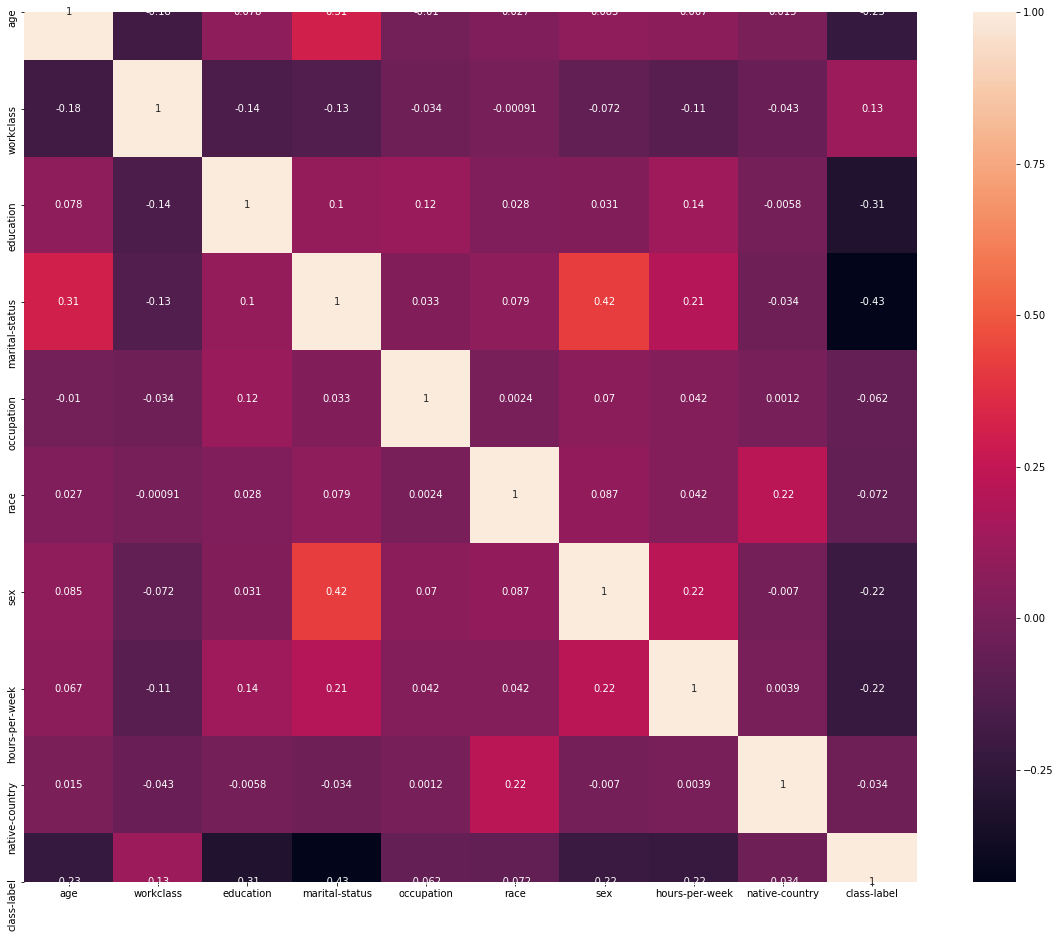

In [46]:
#heat map
#correlation among variables
plt.figure(figsize=(20,16))
sns.heatmap(df_train.corr(), annot=True)

# Cleaing/transformation complete

### KNN implementation

In [47]:
#import classifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
age               32561 non-null float64
workclass         32561 non-null int8
education         32561 non-null int8
marital-status    32561 non-null int8
occupation        32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
hours-per-week    32561 non-null float64
native-country    32561 non-null int64
class-label       32561 non-null int8
dtypes: float64(2), int64(1), int8(7)
memory usage: 985.9 KB


In [49]:
#create X_Train, y_train, X_Test, y_test

X_train = df_train[['age', 'workclass', 'education', 'hours-per-week', 'marital-status','race', 'sex', 'native-country']].copy()
y_train = df_train[['class-label']].copy()

X_test = df_test[['age', 'workclass', 'education', 'hours-per-week', 'marital-status','race', 'sex', 'native-country']].copy()
y_test = df_test[['class-label']].copy()


In [50]:
X_train.head()


,age,workclass,education,hours-per-week,marital-status,race,sex,native-country
0,48.0,1,0,60.0,1,4,1,1
1,46.0,1,1,40.0,0,4,1,1
2,39.0,0,1,40.0,0,4,0,1
3,36.0,1,0,40.0,1,4,1,1
4,49.0,1,0,40.0,1,4,1,1


In [51]:
y_train.head()

,class-label
0,0
1,1
2,1
3,1
4,1


In [52]:
X_test.head()

,age,workclass,education,hours-per-week,marital-status,race,sex,native-country
0,17.0,1,0,20.0,0,4,0,0
1,34.0,1,0,40.0,1,4,1,0
2,33.0,0,1,40.0,1,4,1,0
3,18.0,1,0,3.0,0,4,0,0
4,55.0,1,1,20.0,1,4,1,0


In [53]:
y_test.head()

,class-label
0,1
1,0
2,0
3,1
4,0


In [54]:
## FLatten y_train
y_train = np.ravel(y_train)

In [55]:
#create model

k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### KNN Evaluation

In [56]:
#create pred_knn for accuracy
pred_knn = knn.predict(X_test)
pred_knn

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [57]:
#measure accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_knn)

0.7886493458632762

In [58]:
#measure balanced accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, pred_knn)

0.6571747815630358

In [59]:
print (classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.41      0.48      3846
           1       0.83      0.91      0.87     12435

    accuracy                           0.79     16281
   macro avg       0.70      0.66      0.67     16281
weighted avg       0.77      0.79      0.78     16281



In [60]:
## confusion matrix

confusion_matrix(y_test,pred_knn)



array([[ 1569,  2277],
       [ 1164, 11271]], dtype=int64)

True Negative = 1569

False Positive = 2277

True Positive = 11271

False Negative = 1164

In [61]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 1 columns):
class-label    16281 non-null int8
dtypes: int8(1)
memory usage: 16.0 KB


In [62]:
#iterate k value to find best accuracy
lst_k = []
lst_acc = []

#for k in range(3,127,2): #127 is squareroot of dataset size
for k in range(3,20,2): #loop to create graph  
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    acc = balanced_accuracy_score(y_test, knn.predict(X_test))
    lst_k.append(k)
    lst_acc.append(acc)
    
    print("k = {} BCR: = {}".format(k, acc))

k = 3 BCR: = 0.6609448069116974
k = 5 BCR: = 0.6571747815630358
k = 7 BCR: = 0.6641696258923939
k = 9 BCR: = 0.667639682668127
k = 11 BCR: = 0.6721148411678325
k = 13 BCR: = 0.6689384487321591
k = 15 BCR: = 0.6691019824146404
k = 17 BCR: = 0.667820686289454
k = 19 BCR: = 0.6713991695976644


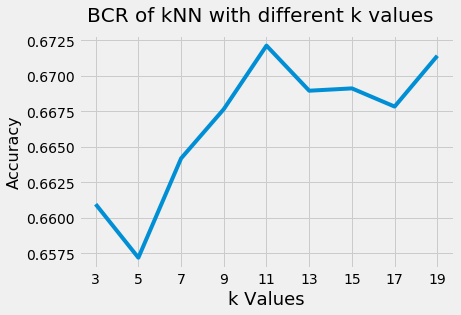

In [63]:
#plot output of k value loop

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure()
fig.suptitle('BCR of kNN with different k values', fontsize = 20)
plt.xlabel('k Values', fontsize=18)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(lst_k, lst_acc)
plt.xticks(lst_k)
plt.show()

k = 11 - Balanced clasifiaction rate = 0.6721148411678325

In [64]:
#update K value
k = 11

#rerun model
knn.fit(X_train, y_train)

#Update new predictions for evaluation
pred_knn_optimized = knn.predict(X_test)

print(accuracy_score(y_test, pred_knn))

print (classification_report(y_test, pred_knn_optimized))

0.7886493458632762
              precision    recall  f1-score   support

           0       0.62      0.42      0.50      3846
           1       0.84      0.92      0.88     12435

    accuracy                           0.80     16281
   macro avg       0.73      0.67      0.69     16281
weighted avg       0.79      0.80      0.79     16281



In [65]:
## confusion matrix

confusion_matrix(y_test,pred_knn_optimized)

array([[ 1628,  2218],
       [ 1001, 11434]], dtype=int64)

True Negative = 1628

False Positive = 2218

True Positive = 11434

False Negative = 1001

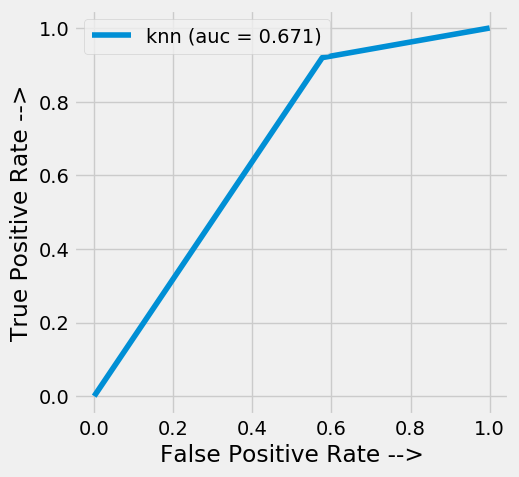

In [66]:
##ROC
knn_fpr, knn_tpr, threshold = roc_curve(y_test, pred_knn_optimized)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='knn (auc = %0.3f)' % auc_knn)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Decision Tree Implementation

In [67]:
dt_features = ['age','workclass', 'education', 'hours-per-week', 'marital-status', 'race', 'sex', 'native-country']
dt_features

['age',
 'workclass',
 'education',
 'hours-per-week',
 'marital-status',
 'race',
 'sex',
 'native-country']

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state = 0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Decision Tree Evaluation

In [69]:
#evaluation
dt_acc = accuracy_score(y_test, dt.predict(X_test))
dt_bcr = balanced_accuracy_score(y_test, dt.predict(X_test))

print (f'Accuracy of the model is {dt_acc}')
print (f'BCR of the model is {dt_bcr}')


Accuracy of the model is 0.7705300657207789
BCR of the model is 0.6595906827829205


In [70]:
#classificaiton report
dt_base_pred = dt.predict(X_test)

print (classification_report(y_test, dt_base_pred))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      3846
           1       0.84      0.87      0.85     12435

    accuracy                           0.77     16281
   macro avg       0.68      0.66      0.67     16281
weighted avg       0.76      0.77      0.76     16281



In [71]:
## confusion matrix

confusion_matrix(y_test,dt_base_pred)

array([[ 1728,  2118],
       [ 1618, 10817]], dtype=int64)

True Negative = 1728

False Positive = 2118

True Positive = 10817

False Negative = 1618

In [72]:
from sklearn import tree
text_representation = tree.export_text(dt, feature_names=dt_features)
print (text_representation)

|--- marital-status <= 0.50
|   |--- education <= 0.50
|   |   |--- hours-per-week <= 42.50
|   |   |   |--- age <= 32.50
|   |   |   |   |--- workclass <= 0.50
|   |   |   |   |   |--- age <= 21.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  21.50
|   |   |   |   |   |   |--- race <= 1.50
|   |   |   |   |   |   |   |--- hours-per-week <= 39.00
|   |   |   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |   |   |   |--- hours-per-week <= 34.00
|   |   |   |   |   |   |   |   |   |   |--- race <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- race >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- hours-per-week >  34.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- hours-per-week >  39.00
|   |

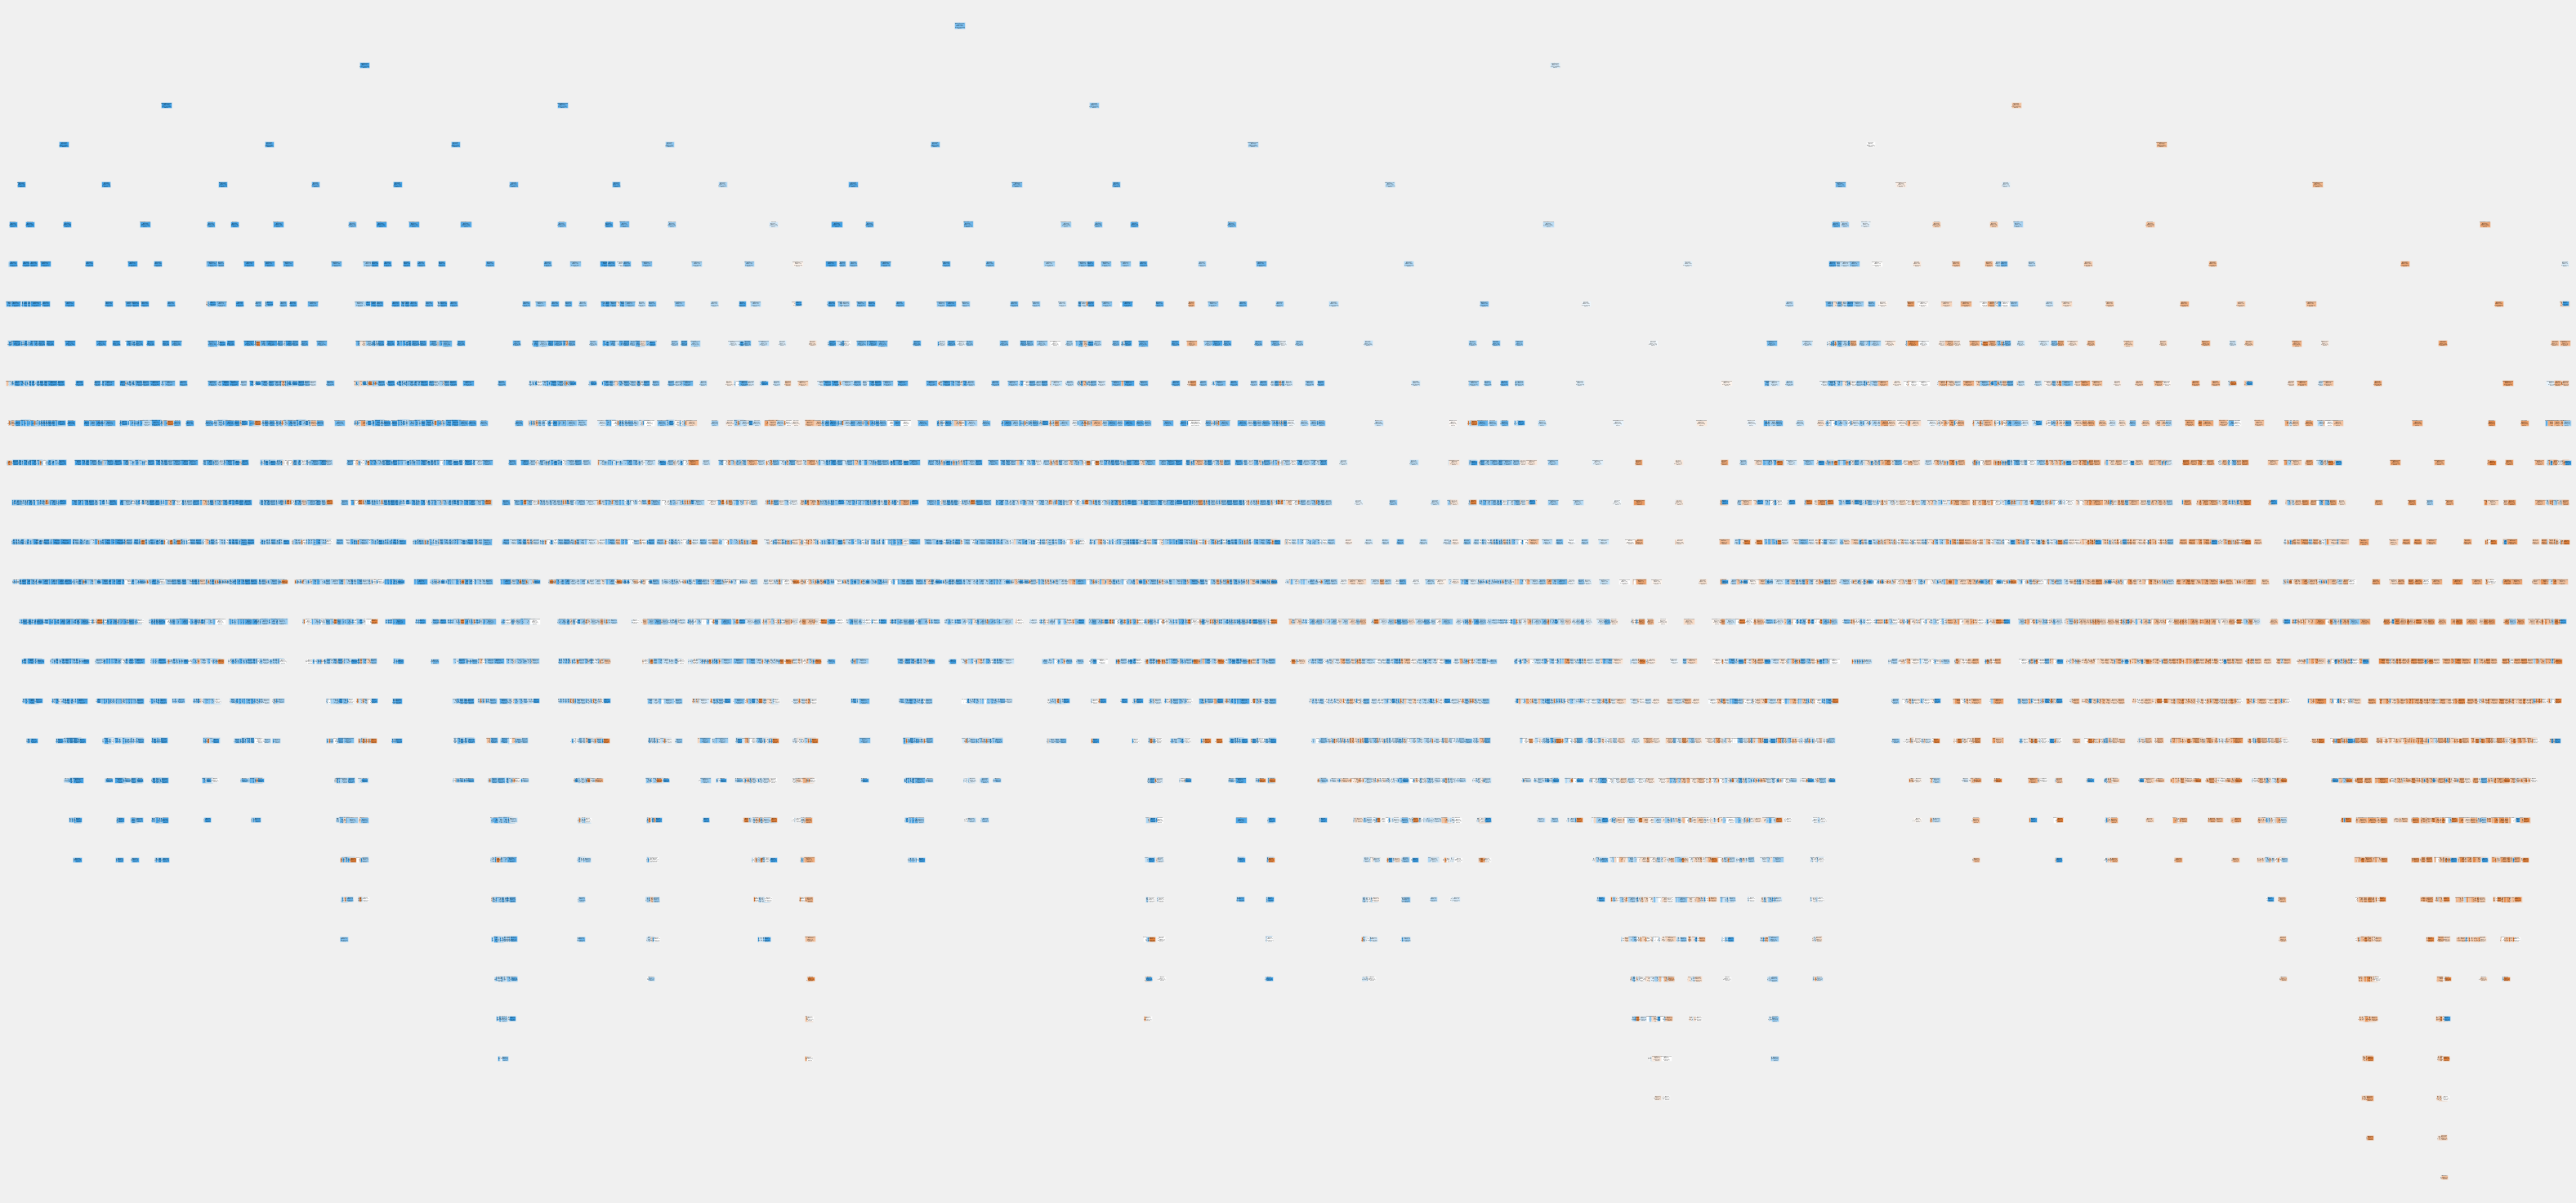

In [73]:
tree_fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(dt,
                   feature_names=dt_features,
                   class_names=['0', '1'],
                   filled=True)

In [74]:
#criterion{“gini”, “entropy”}, default=”gini”
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_entropy.fit(X_train, y_train)
acc = accuracy_score(y_test, dt_entropy.predict(X_test))
dt_bcr_entro = balanced_accuracy_score(y_test, dt_entropy.predict(X_test))
print(f'Accuracy of the model is {acc}')
print (f'BCR of the model (entropy) is {dt_bcr_entro}')

Accuracy of the model is 0.7707143295866348
BCR of the model (entropy) is 0.6605194750612703


In [75]:
#classificaiton report
dt_entro_pred = dt_entropy.predict(X_test)

print (classification_report(y_test, dt_entro_pred))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      3846
           1       0.84      0.87      0.85     12435

    accuracy                           0.77     16281
   macro avg       0.68      0.66      0.67     16281
weighted avg       0.76      0.77      0.77     16281



In [76]:
## confusion matrix

confusion_matrix(y_test,dt_entro_pred)

array([[ 1737,  2109],
       [ 1624, 10811]], dtype=int64)

True Negative = 1737

False Positive = 2109

True Positive = 10811

False Negative = 1624

In [77]:
text_representation = tree.export_text(dt_entropy, feature_names=dt_features)
print(text_representation)

|--- marital-status <= 0.50
|   |--- education <= 0.50
|   |   |--- age <= 32.50
|   |   |   |--- hours-per-week <= 40.50
|   |   |   |   |--- age <= 21.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  21.50
|   |   |   |   |   |--- workclass <= 0.50
|   |   |   |   |   |   |--- hours-per-week <= 29.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- hours-per-week >  29.00
|   |   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |   |--- native-country <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 22.50
|   |   |   |   |   |   |   |   |   |   |--- race <= 3.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- race >  3.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- age >  22.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- native-country >  0.50
|   | 

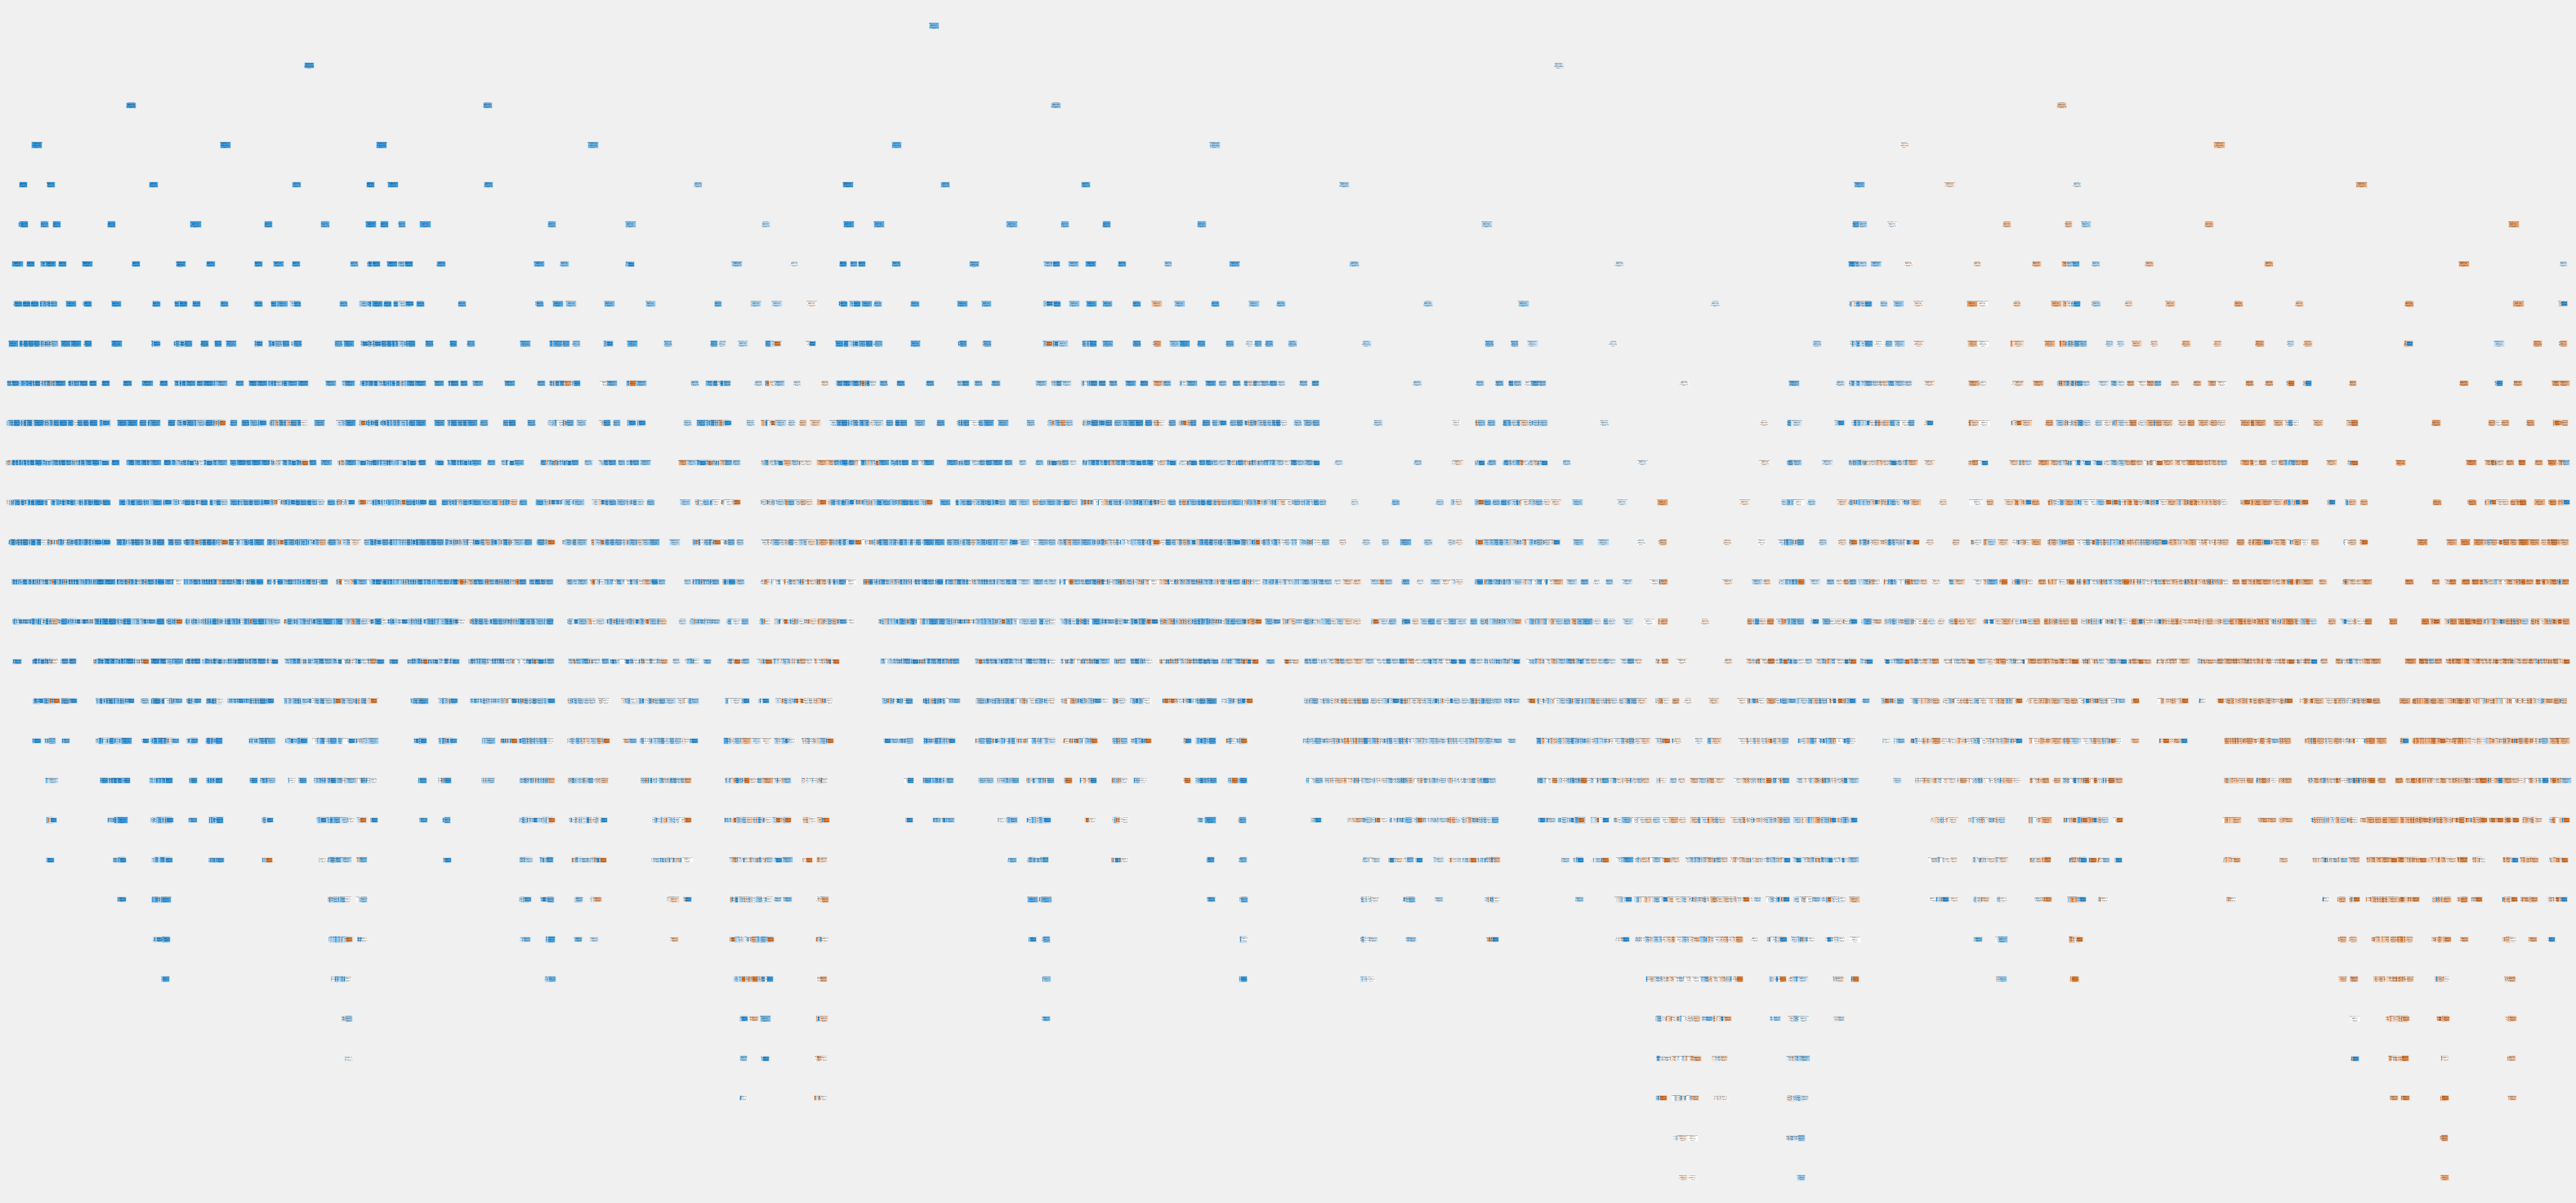

In [78]:
tree_fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(dt_entropy,
feature_names=dt_features,
class_names=['0', '1'],
filled=True)

In [79]:
dt_28leaf = tree.DecisionTreeClassifier( max_leaf_nodes = 28)
dt_28leaf.fit(X_train, y_train)
acc = accuracy_score(y_test, dt_28leaf.predict(X_test))
dt_bcr_28 = balanced_accuracy_score(y_test, dt_28leaf.predict(X_test))
print(f'Accuracy of the model is {acc}')
print (f'BCR of the model (28) is {dt_bcr_28}')

Accuracy of the model is 0.8244579571279406
BCR of the model (28) is 0.6896860868403374


In [80]:
#classificaiton report
dt_28leaf_pred = dt_28leaf.predict(X_test)

print (classification_report(y_test, dt_28leaf_pred))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54      3846
           1       0.84      0.95      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.78      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



In [81]:
## confusion matrix

confusion_matrix(y_test,dt_28leaf_pred)

array([[ 1670,  2176],
       [  682, 11753]], dtype=int64)

True Negative = 1670

False Positive = 2176

True Positive = 11753

False Negative = 682

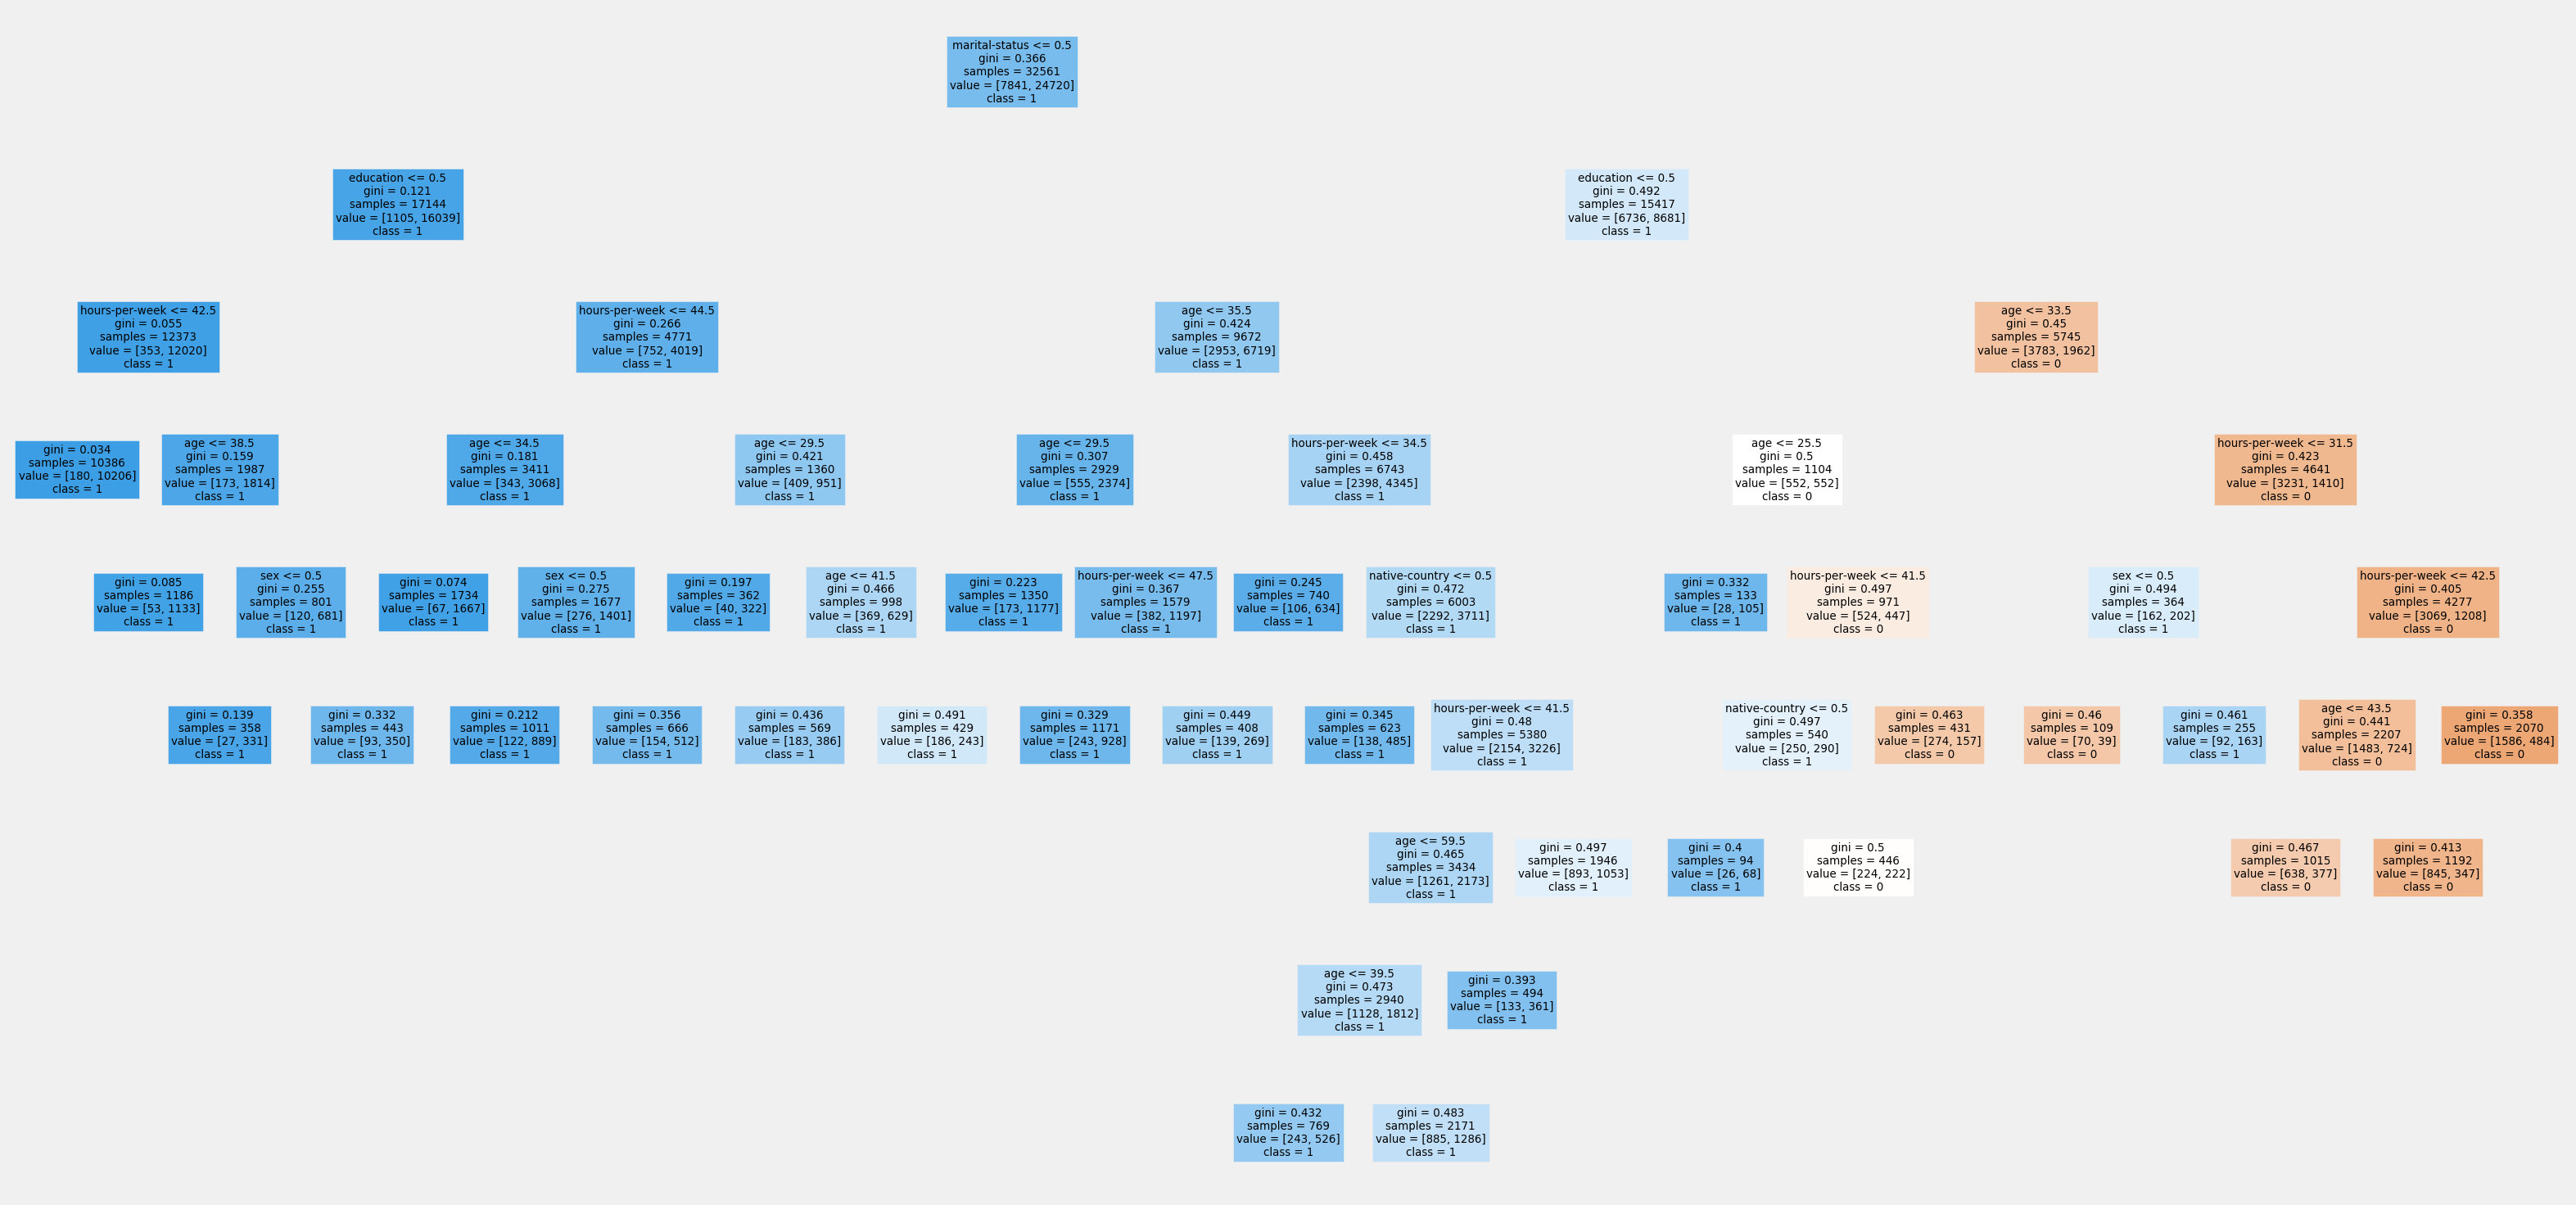

In [82]:
tree_fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(dt_28leaf,
feature_names=dt_features,
class_names=['0', '1'],
filled=True)

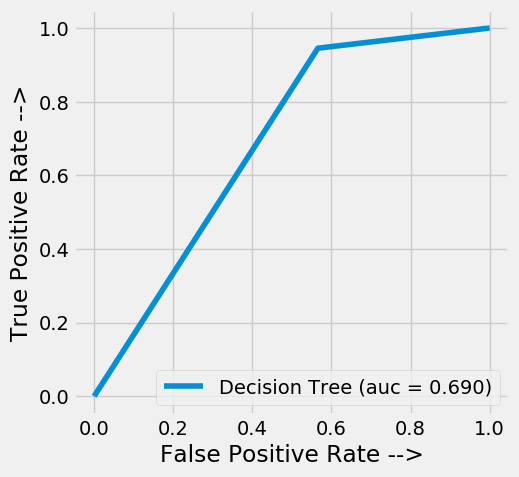

In [83]:
##ROC
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_28leaf_pred)
auc_dt = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Naïve Bayes implementation

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb_class = GaussianNB()

In [85]:
nb_class.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
nb_pred = nb_class.predict(X_test)

### Naïve Bayes evaluation

In [87]:
nb_BCR = balanced_accuracy_score(y_test, nb_class.predict(X_test))
print (f'BCR of the model is {nb_BCR}')

print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

BCR of the model is 0.6794032243798799
Accuracy: 0.8068300472943922


In [88]:
#classification_report
print (classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      3846
           1       0.84      0.92      0.88     12435

    accuracy                           0.81     16281
   macro avg       0.74      0.68      0.70     16281
weighted avg       0.79      0.81      0.79     16281



In [89]:
## confusion matrix

confusion_matrix(y_test,nb_pred)

array([[ 1684,  2162],
       [  983, 11452]], dtype=int64)

True Negative = 1684

False Positive = 2162

True Positive = 11452

False Negative = 983

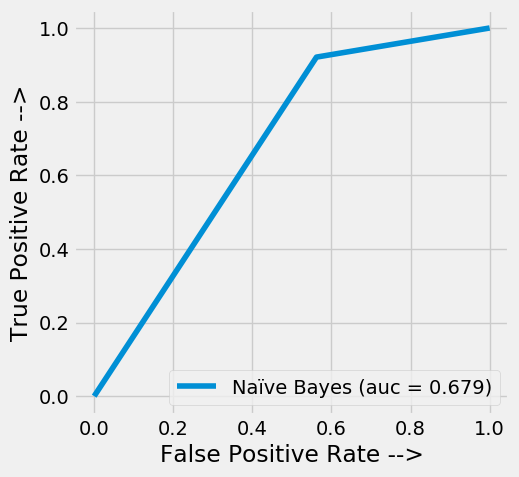

In [90]:
##ROC
nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_pred)
auc_nb = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Naïve Bayes (auc = %0.3f)' % auc_nb)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Neural Network Implementaiton

In [91]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes= (8,8,8),
                   activation= 'relu',
                   solver= 'adam',
                   max_iter= 1000)

mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:

nn_base = mlp.predict (X_test)

from sklearn.metrics import accuracy_score

nn_BCR = balanced_accuracy_score(y_test, mlp.predict(X_test))
print (f'BCR of the model is {nb_BCR}')
print (accuracy_score(y_test, nn_base))

BCR of the model is 0.6794032243798799
0.8155518702782384


In [93]:
#classification_report
print (classification_report(y_test, nn_base))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49      3846
           1       0.83      0.95      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.77      0.67      0.69     16281
weighted avg       0.80      0.82      0.79     16281



In [94]:
## confusion matrix

confusion_matrix(y_test,nn_base)

array([[ 1469,  2377],
       [  626, 11809]], dtype=int64)

True Negative = 1577

False Positive = 2269

True Positive = 11799

False Negative = 636

### Neural Network Evaluation

In [95]:
# set up a list of values for each parameter for cross-validation
parameter_space = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
                   'hidden_layer_sizes': [(8,4,2), (8,6,4,2), (8,8,2)],
                   'solver': ['lbfgs', 'adam','sgd'],
                   'learning_rate' : ['constant', 'adaptive', 'invscaling']
 }


In [96]:
# import the library
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MLPClassifier(random_state=42), param_grid = parameter_space, n_jobs = -1, cv = 5, verbose = 5)
# fitting the model for grid search
clf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(8, 4, 2), (8, 6, 4, 2

In [97]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)
# All results
print('ALL RESULTS')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'constant', 'solver': 'adam'}
ALL RESULTS
0.814 (+/-0.003) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.814 (+/-0.006) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'constant', 'solver': 'adam'}
0.799 (+/-0.020) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'constant', 'solver': 'sgd'}
0.814 (+/-0.003) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.814 (+/-0.006) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.815 (+/-0.004) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.814 (+/-0.003) for {'activation': 'identity', 'hidden_layer_sizes': (8, 4, 2), 'learnin

###### Best Hyperparamaters determined by GridSearchCV:

- activation: 'logistic'
- hidden_layer_sizes: (8, 4, 2)
- learning_rate: 'constant'
- solver: 'adam'

In [98]:
#recreating NN using identified hyperparameters

optimized_mlp = MLPClassifier(hidden_layer_sizes= (8,4,2),
                             activation= 'logistic',
                             solver= 'adam',
                             verbose = 1,
                             random_state=42,
                              learning_rate= 'constant',
                             max_iter=1000
                             )

#fit data
optimized_mlp.fit(X_train,y_train)

Iteration 1, loss = 0.55277263
Iteration 2, loss = 0.54912878
Iteration 3, loss = 0.54240431
Iteration 4, loss = 0.52405490
Iteration 5, loss = 0.49482623
Iteration 6, loss = 0.46814679
Iteration 7, loss = 0.44897013
Iteration 8, loss = 0.43688659
Iteration 9, loss = 0.42868610
Iteration 10, loss = 0.42251800
Iteration 11, loss = 0.41832469
Iteration 12, loss = 0.41468287
Iteration 13, loss = 0.41193270
Iteration 14, loss = 0.40903701
Iteration 15, loss = 0.40620265
Iteration 16, loss = 0.40377002
Iteration 17, loss = 0.40113834
Iteration 18, loss = 0.39894022
Iteration 19, loss = 0.39748789
Iteration 20, loss = 0.39654588
Iteration 21, loss = 0.39430458
Iteration 22, loss = 0.39275432
Iteration 23, loss = 0.39162718
Iteration 24, loss = 0.39126474
Iteration 25, loss = 0.39059604
Iteration 26, loss = 0.38992719
Iteration 27, loss = 0.38883479
Iteration 28, loss = 0.38854100
Iteration 29, loss = 0.38743640
Iteration 30, loss = 0.38742089
Iteration 31, loss = 0.38807399
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [99]:
predict_train = optimized_mlp.predict(X_train)
predict_test_optimized = optimized_mlp.predict(X_test)

from sklearn.metrics import accuracy_score

NN_bcr_optimized = balanced_accuracy_score(y_test, optimized_mlp.predict(X_test))

print (f'BCR of the model is {NN_bcr_optimized}')

print(accuracy_score(y_test, predict_test_optimized))
print (classification_report(y_test, predict_test_optimized))

BCR of the model is 0.6910945653748948
0.8207112585222038
              precision    recall  f1-score   support

           0       0.69      0.45      0.54      3846
           1       0.85      0.94      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281



In [100]:
## confusion matrix

confusion_matrix(y_test,predict_test_optimized)

array([[ 1713,  2133],
       [  786, 11649]], dtype=int64)

True Negative = 1713

False Positive = 2133

True Positive = 11649

False Negative = 786

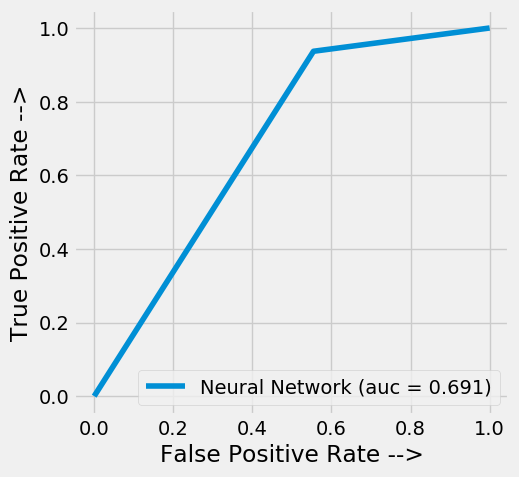

In [101]:
##ROC
nn_fpr, nn_tpr, threshold = roc_curve(y_test, predict_test_optimized)
auc_nn = auc(nn_fpr, nn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='Neural Network (auc = %0.3f)' % auc_nn)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### SVM Implementation

In [102]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

#Linear
C = 1.0 #SVM regularization parameter

linear_svc = svm.SVC(kernel = 'linear',  gamma='auto', C =C).fit(X_train, y_train)

predictions_linear = linear_svc.predict(X_test)

BCR_linear_svc = balanced_accuracy_score(y_test, linear_svc.predict(X_test))

print (f'BCR of the model is {BCR_linear_svc}')

acc = accuracy_score(y_test, predictions_linear)

print (f'Accuracy of the linear model is {acc}')

BCR of the model is 0.7025683005607317
Accuracy of the linear model is 0.8186229347091702


In [103]:
#classification report

print (classification_report(y_test, predictions_linear))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56      3846
           1       0.85      0.92      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.76      0.70      0.72     16281
weighted avg       0.81      0.82      0.81     16281



In [104]:
## confusion matrix

confusion_matrix(y_test,predictions_linear)

array([[ 1856,  1990],
       [  963, 11472]], dtype=int64)

True Negative = 1856

False Positive = 1990

True Positive = 11472

False Negative = 963

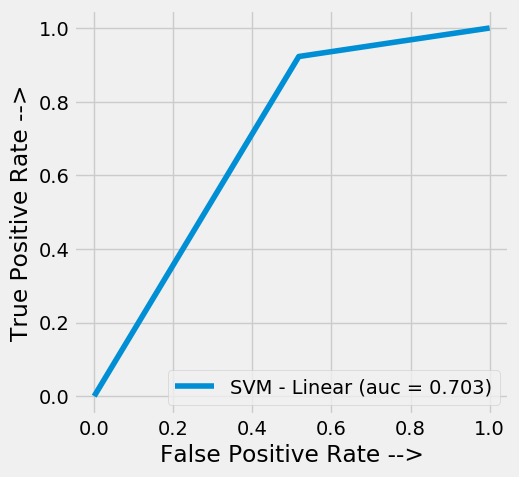

In [105]:
##ROC
svm_linear_fpr, svm_linear_tpr, threshold = roc_curve(y_test, predictions_linear)
auc_svm_linear = auc(svm_linear_fpr, svm_linear_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_linear_fpr, svm_linear_tpr, linestyle='-', label='SVM - Linear (auc = %0.3f)' % auc_svm_linear)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [106]:
#rbf

rbf_svc = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X_train, y_train)

predictions_rbf = rbf_svc.predict(X_test)

BCR_rbf_svc = balanced_accuracy_score(y_test, rbf_svc.predict(X_test))

print (f'BCR of the model is {BCR_rbf_svc}')

acc = accuracy_score(y_test, predictions_rbf)

print (f'Accuracy of the rbf model is {acc}')

BCR of the model is 0.6852522979085629
Accuracy of the rbf model is 0.8154904489896198


In [107]:
#classification_report
print (classification_report(y_test, predictions_rbf))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53      3846
           1       0.84      0.93      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.75      0.69      0.71     16281
weighted avg       0.80      0.82      0.80     16281



In [108]:
## confusion matrix

confusion_matrix(y_test,predictions_rbf)

array([[ 1686,  2160],
       [  844, 11591]], dtype=int64)

True Negative = 1686

False Positive = 2160

True Positive = 11591

False Negative = 844

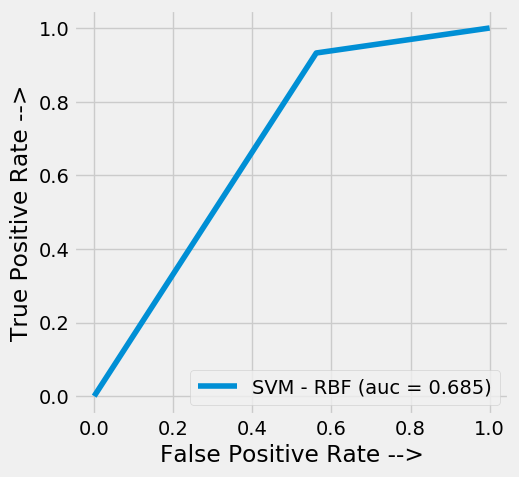

In [109]:
##ROC
svm_rbf_fpr, svm_rbf_tpr, threshold = roc_curve(y_test, predictions_rbf)
auc_svm_rbf = auc(svm_rbf_fpr, svm_rbf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_rbf_fpr, svm_rbf_tpr, linestyle='-', label='SVM - RBF (auc = %0.3f)' % auc_svm_rbf)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [110]:
#poly

poly_svc = svm.SVC(kernel='poly', degree=2, gamma = 'auto', C=C).fit(X_train, y_train)
predictions_poly = poly_svc.predict(X_test)

BCR_poly_svc = balanced_accuracy_score(y_test, poly_svc.predict(X_test))

print (f'BCR of the model is {BCR_poly_svc}')


acc = accuracy_score(y_test, predictions_poly)

print (f'Accuracy of the polynomial model is {acc}')

BCR of the model is 0.6859065580958582
Accuracy of the polynomial model is 0.8227995823352374


In [111]:
#classification_report
print (classification_report(y_test, predictions_poly))

              precision    recall  f1-score   support

           0       0.71      0.43      0.53      3846
           1       0.84      0.95      0.89     12435

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281



In [112]:
## confusion matrix

confusion_matrix(y_test,predictions_poly)

array([[ 1640,  2206],
       [  679, 11756]], dtype=int64)

True Negative = 1640

False Positive = 2206

True Positive = 11756

False Negative = 679

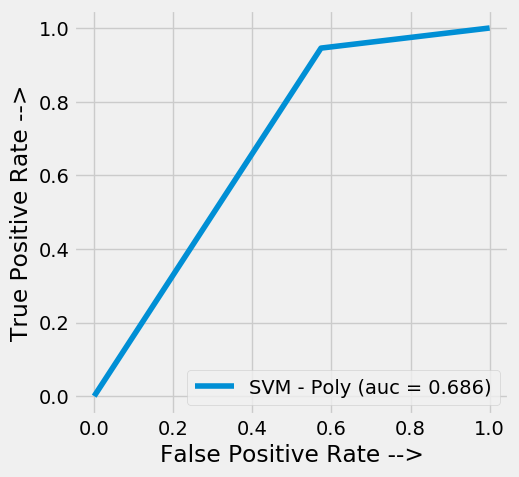

In [113]:
##ROC
svm_poly_fpr, svm_poly_tpr, threshold = roc_curve(y_test, predictions_poly)
auc_svm_poly = auc(svm_poly_fpr, svm_poly_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_poly_fpr, svm_poly_tpr, linestyle='-', label='SVM - Poly (auc = %0.3f)' % auc_svm_poly)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#SVM_param_grid = {'C': [0.1,1, 10],'kernel': ['rbf', 'poly', 'linear']}

SVM_param_grid = {'C': [0.1,1, 10]}
grid = GridSearchCV(SVC(),SVM_param_grid,refit=True,verbose=7, cv = 3)
grid.fit(X_train,y_train)

# Best paramete set
print('Best parameters found:\n', grid.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.788, total=  10.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.789, total=  10.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.2s remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=0.1, score=0.790, total=  10.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.4s remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=1, score=0.813, total=  12.7s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   43.1s remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=1, score=0.811, total=  13.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   56.1s remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=1, score=0.812, total=  11.5s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.807, total=  34.9s
[CV] C=10 ............................................................


C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.808, total=  32.3s
[CV] C=10 ............................................................


C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=10, score=0.807, total=  35.8s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min finished
C:\Users\Jarrod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters found:
 {'C': 1}


Grid search found optimal C value as 1

NOTE: I attempted multiple times to run the grid search on the kernal as well but it took in excess of 18 hours with no result. I determined that it was a moot point as each SVM I implemented was running with the optimal C value of 1 

Line is commented out to demonstrate I knew how to implement the kernal search but I'd advised against executing it.